<a href="https://colab.research.google.com/github/FauzanNR/rock-paper-scissor-machine-learning-dicoding/blob/main/rockpapercissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fauzan Nur Rifai
 
fauzannur.fnr@gmail.com

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%rm -r '/content/rockpaperscissors'and '/content/__MACOSX'
%ls

rm: cannot remove '/content/rockpaperscissorsand': No such file or directory
rm: cannot remove '/content/__MACOSX': No such file or directory
sample_data/


In [ ]:
!wget 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'

--2021-05-04 04:05:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   511KB/s    in 5m 15s  

2021-05-04 04:11:09 (1002 KB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
 
path = '/content/rockpaperscissors' 
data_dir = pathlib.Path(path)
# ['paper','rock','scissors']
# classes = os.listdir(data_dir)[2:]
classes = ['rock','paper','scissors']

In [ ]:
batch_size = 32
image_size = 128
 
train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest'
                    )
 
test_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest'
                    )

In [ ]:
train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size=(image_size, image_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    classes = classes,
    subset = 'training',
    shuffle=True
)
val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode= 'categorical',
    classes=classes,
    subset='validation',
    shuffle=True
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
 
AUTOTUNE = tf.data.experimental.AUTOTUNE
 
def prepare(ds, shuffle=False):
  if shuffle:
    ds = ds.shuffle(1000)
  return ds.prefetch(buffer_size=AUTOTUNE)
 
  train_data = prepare(train_data, True)
  val_data = prepare(val_data, True)

In [ ]:
imgs, labels = next(val_data)

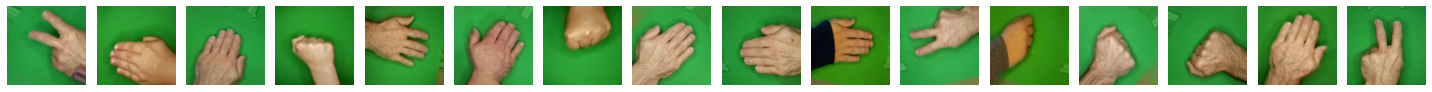

In [ ]:

def plotImage(imgs_arr):
  fig, axes = plt.subplots(1,16,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(imgs_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImage(imgs)
# print(labels)

In [ ]:
model = Sequential([
             layers.Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(image_size,image_size,3)),
             layers.MaxPool2D(),
             layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
             layers.MaxPool2D(),
             layers.Conv2D(64,kernel_size=(3,3), padding='same', activation='relu'),
             layers.MaxPool2D(),
             layers.Dropout(0.3),
             layers.Flatten(),
             layers.Dense(512, activation='relu'),
             layers.Dense(256, activation='relu'),
             layers.Dropout(0.3),
             layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    optimizer= keras.optimizers.Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)       

In [ ]:
earlystop = keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    monitor='val_accuracy',
    restore_best_weights = True,
    verbose=1
)

In [ ]:
model_history = model.fit(
    train_data, 
    validation_data = val_data,
    epochs=40,
    callbacks=[earlystop]
)

Epoch 1/40
42/42 [==============================] - 12s 281ms/step - loss: 1.0972 - accuracy: 0.3747 - val_loss: 1.0437 - val_accuracy: 0.4005
Epoch 2/40
42/42 [==============================] - 11s 272ms/step - loss: 0.9544 - accuracy: 0.5226 - val_loss: 0.6843 - val_accuracy: 0.7380
Epoch 3/40
42/42 [==============================] - 11s 272ms/step - loss: 0.5630 - accuracy: 0.7846 - val_loss: 0.4175 - val_accuracy: 0.8547
Epoch 4/40
42/42 [==============================] - 11s 272ms/step - loss: 0.3513 - accuracy: 0.8776 - val_loss: 0.2660 - val_accuracy: 0.9085
Epoch 5/40
42/42 [==============================] - 11s 273ms/step - loss: 0.3053 - accuracy: 0.8816 - val_loss: 0.3270 - val_accuracy: 0.8776
Epoch 6/40
42/42 [==============================] - 11s 272ms/step - loss: 0.3041 - accuracy: 0.9050 - val_loss: 0.1558 - val_accuracy: 0.9519
Epoch 7/40
42/42 [==============================] - 11s 273ms/step - loss: 0.1469 - accuracy: 0.9507 - val_loss: 0.1399 - val_accuracy: 0.9588

18


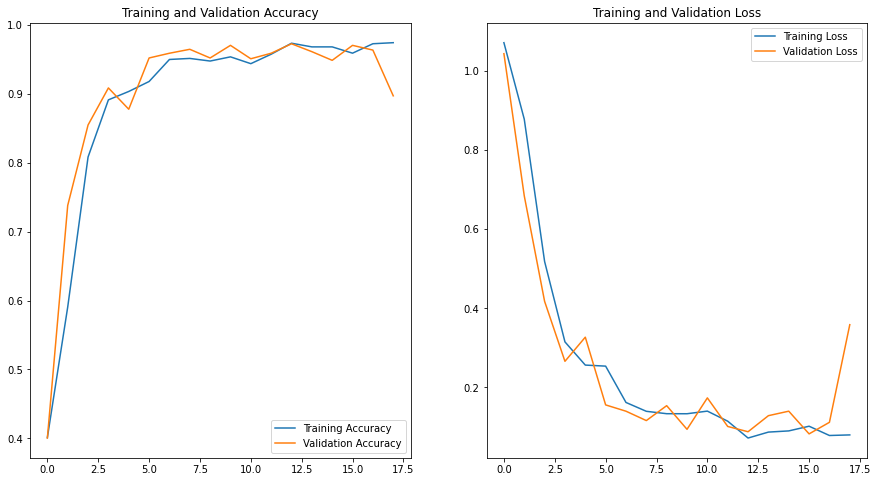

In [ ]:
epochs = len(model_history.epoch)
print(epochs)
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
 
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
 
# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot();
# print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
%mkdir 'test'

<IPython.core.display.Javascript object>

Saved to test/photo42.jpg
tf.Tensor([0.57611686 0.21194157 0.21194157], shape=(3,), dtype=float32)
merupakan rock dengan kecocokan 57.61%


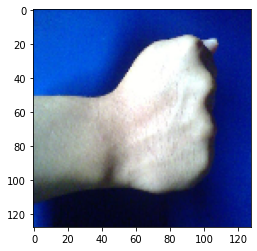

In [ ]:
from IPython.display import Image
from google.colab import files
import random
 
i = random.randint(1,100)
 
filename ='test/photo{}.jpg'.format(i)
#filename= files.upload().keys()
#for fn in filename:
#  filename = fn
 
# filename = '/content/rockpaperscissors/rps-cv-images/rock/01dM3ewPIsnBICu1.png'

try:
  filename = take_photo(filename)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  imgpred = keras.preprocessing.image.load_img(filename, target_size=(image_size,image_size))
  imgarray = keras.preprocessing.image.img_to_array(imgpred)
  imgarray = tf.expand_dims(imgarray, 0)
  predscore = model.predict(imgarray)
  score = tf.nn.softmax(predscore[0])
  print(score)
  print(
    "merupakan {} dengan kecocokan {:.2f}%"
    .format(classes[np.argmax(score)], np.max(score)*100)
  )
  plt.imshow(imgpred)
except Exception as err:
 
  print(str(err))